In [8]:
import pandas as pd
import numpy as np
import ast

train = pd.read_csv('ratings.csv')

for idx, column in zip([0,1], ['user', 'item']):
    values = [ui.split(':')[idx] for ui in train['UserId:ItemId']]
    train[column] = values
    
    print(column, len(np.unique(train[column])))

user 34105
item 19498


In [5]:
test = pd.read_csv('targets.csv')

for idx, column in zip([0,1], ['user', 'item']):
    values = [ui.split(':')[idx] for ui in test['UserId:ItemId']]
    test[column] = values
    
    print(column, len(np.unique(test[column])))

user 4872
item 9698


In [13]:
line = lines[1]
idx_comma = line.find(',')

item = line[:idx_comma]  
items[item] = k
attributes  = ast.literal_eval(line[idx_comma+1:])
attributes

{'Title': 'Edison Kinetoscopic Record of a Sneeze',
 'Year': '1894',
 'Rated': 'N/A',
 'Released': '09 Jan 1894',
 'Runtime': '1 min',
 'Genre': 'Documentary, Short',
 'Director': 'William K.L. Dickson',
 'Writer': 'N/A',
 'Actors': 'Fred Ott',
 'Plot': "A man (Edison's assistant) takes a pinch of snuff and sneezes. This is one of the earliest Edison films and was the first motion picture to be copyrighted in the United States.",
 'Language': 'N/A',
 'Country': 'USA',
 'Awards': 'N/A',
 'Poster': 'N/A',
 'Metascore': 'N/A',
 'imdbRating': '5.9',
 'imdbVotes': '988',
 'imdbID': 'tt0000008',
 'Type': 'movie',
 'Response': 'True'}

In [14]:
lines = open('content.csv', encoding='utf-8').read().split('\n')

cols = lines[0].split(',')
content = {}

vocabulary = []
vocab_df   = {}
items = {}
for k, line in enumerate(lines[1:-1]):
    idx_comma = line.find(',')

    item = line[:idx_comma]  
    items[item] = k
    attributes  = ast.literal_eval(line[idx_comma+1:])
    
    ### DICTIONARY OF ATTRIBUTES
    content[item] = []
    content[item].append(attributes)
    
    if 'Genre' not in attributes: 
        description = ['n/a']
    else:
        description = [att.lower().strip() for att in attributes['Genre'].split(',')]
    
    content[item].append(description)
        
    for term in description:
        if term not in vocab_df:
            vocab_df[term] = 1
        else:
            vocab_df[term] += 1

### 15 seconds

In [24]:
len(list(vocab_df.keys())), len(list(vocab_df.values()))

(29, 29)

[('documentary', 1768), ('short', 791), ('horror', 2654), ('adventure', 1973), ('fantasy', 1021), ('western', 272), ('action', 3200), ('drama', 10928), ('romance', 3236), ('history', 680), ('crime', 3008), ('comedy', 7052), ('family', 972), ('sport', 421), ('n/a', 144), ('biography', 978), ('thriller', 3246), ('mystery', 1324), ('animation', 711), ('war', 529), ('sci-fi', 1148), ('music', 651), ('musical', 422), ('film-noir', 156), ('adult', 5), ('talk-show', 1), ('news', 55), ('reality-tv', 7), ('game-show', 1)]


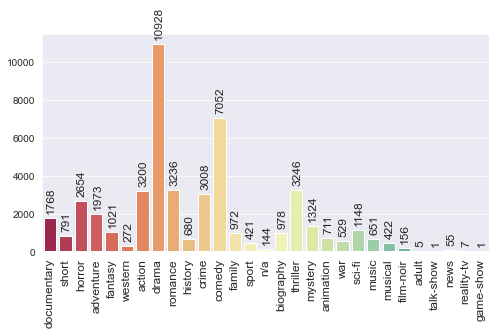

In [46]:
print(list(vocab_df.items()))

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(x=np.arange(len(vocab_df)), y=list(vocab_df.values()), palette="Spectral", ax=ax)
plt.xticks(np.arange(len(vocab_df)), list(vocab_df.keys()) , rotation=90, fontsize=12)

for k,cat in enumerate(list(vocab_df.keys())):
    plt.text(k-0.25, vocab_df[cat]+350, str(vocab_df[cat]), rotation=90, fontsize=12 )

# ax.set(xticks= )
plt.savefig('categories.png',format='png', bbox_inches='tight', dpi=200)
plt.show()